In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
arr = np.random.randn(10)
type(arr)
print(arr)

[-0.08002259  0.7096911  -0.28113194  0.32956827  0.09134669  0.45683099
  0.83269878  0.98849341 -0.84532939 -1.0557801 ]


In [5]:
arr = np.random.randn(1000)
print(arr.shape)

(1000,)


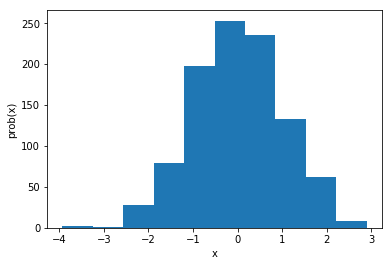

In [6]:
plt.hist(arr, bins=10)
plt.xlabel('x')
plt.ylabel('prob(x)')
plt.show()

## Normal Distribution
Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, 
showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution 
will appear as a bell curve.

In [7]:
print(np.mean(arr))  ##Mean near 0
print(np.std(arr))   ##Std Deviation near 1

0.008584161040656454
0.99685492244276


## Standard Deviation
The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the 
square root of the variance. It is calculated as the square root of variance by determining the variation between each data 
point relative to the mean. If the data points are further from the mean, there is a higher deviation within the data set; 
thus, the more spread out the data, the higher the standard deviation.

## Variance
Variance (σ2) is a measurement of the spread between numbers in a data set. It measures how far each number in the set is from 
the mean and is calculated by taking the differences between each number in the set and the mean, squaring the differences 
(to make them positive) and dividing the sum of the squares by the number of values in the set.

In [8]:
marks = np.random.randn(1000) * 10 + 60
print(np.mean(marks))
print(np.std(marks))

59.738840816941206
10.37588480198448


(array([  6.,  13.,  50., 158., 250., 245., 174.,  76.,  22.,   6.]),
 array([23.91370533, 30.90392628, 37.89414723, 44.88436818, 51.87458913,
        58.86481008, 65.85503103, 72.84525199, 79.83547294, 86.82569389,
        93.81591484]),
 <a list of 10 Patch objects>)

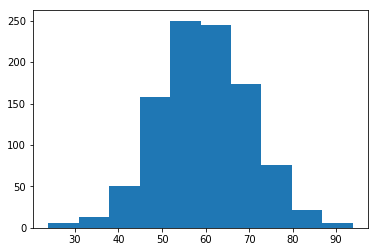

In [9]:
plt.hist(marks, bins=10)


## Normal Distribution and Standard Normal Distribution

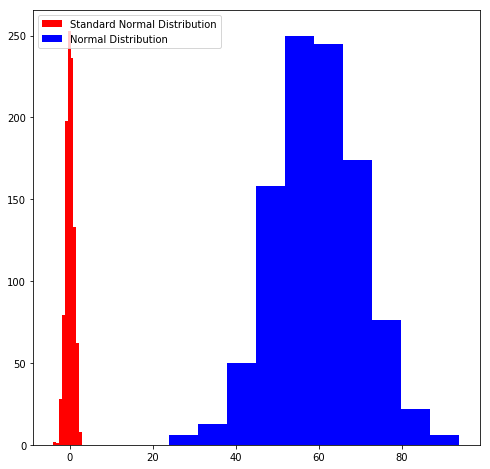

In [10]:
plt.figure(figsize=(8,8))
plt.hist(arr, bins=10, color='red', label='Standard Normal Distribution')
plt.hist(marks, bins=10, color='blue', label='Normal Distribution')
plt.legend()


## Multivariate Normal Distribution

In [11]:
# Sweetness and Nutrition
apples_data = np.random.multivariate_normal(mean=[5,7],cov=[[3,0.5],[0.5,1.2]], size=1000)
oranges_data = np.random.multivariate_normal(mean=[10,12], cov=[[2,-1.5],[-1.5,1.9]], size=800)

In [12]:
print(type(apples_data))
print(apples_data[:5,:])

<class 'numpy.ndarray'>
[[5.30158256 5.23425452]
 [3.21346727 6.69057526]
 [4.49825612 5.85048363]
 [6.12485719 6.27285856]
 [6.34541913 6.52185132]]


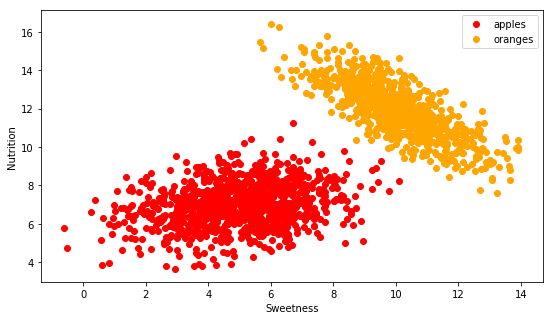

In [13]:
plt.figure(figsize=[9,5])
plt.xlabel('Sweetness')
plt.ylabel('Nutrition')
plt.scatter(apples_data[:, 0:1], apples_data[:, 1:], color='red', label='apples')
plt.scatter(oranges_data[:, 0:1], oranges_data[:, 1:], color='orange', label='oranges')
plt.legend()
plt.show()

## Data Preparation

In [14]:
total_no_of_fruits = apples_data.shape[0] + oranges_data.shape[0]
print(total_no_of_fruits)

1800


In [15]:
X = np.zeros((total_no_of_fruits, 3))
X[:1000, :-1] = apples_data
X[1000:, :-1] = oranges_data
X[1000:, 2] = 1

In [16]:
X_values = X[:, :-1]
print(type(X_values))
Y_values = X[:, -1]
print(X_values.shape)
print(Y_values.shape)


<class 'numpy.ndarray'>
(1800, 2)
(1800,)


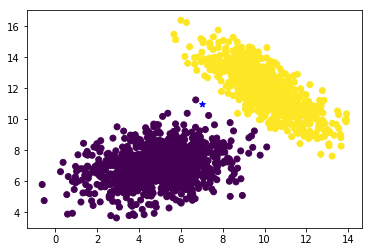

In [17]:
test_fruit = [7, 11]
plt.scatter(test_fruit[0], test_fruit[1], marker='*', color='blue')
plt.scatter(X_values[:, 0], X_values[:, 1], c=Y_values)

In [18]:
def calcDist(p1, p2):
    return np.sum((p2-p1)**2)**0.5

In [19]:
def knn(X,Y,test, k=5):
    m=X.shape[0]
    d=[]
    print(type(d))
    for i in range(m):
        dist = calcDist(test, X[i])
        d.append((dist, Y[i]))
        
    d=np.array(sorted(d))[:,1]
    d=d[:k]
    t=np.unique(d, return_counts=True)
    idx=np.argmax(t[1])
    pred=int(t[0][idx])
    
    if pred==0:
        print("Apple")
    else:
        print("Orange")
    
    print(d)

In [24]:
print(type(X_values))
print(type(Y_values))

knn(X_values,Y_values,test=np.array([7,11]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
Apple
[0. 0. 0. 1. 1.]
